<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Benford's Law

_Authors: Riley Dallas (AUS)_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pd.set_option('display.max_columns', 999)

## Learning Objectives
---

- Understand what Benford's law is
- Use Benford's law to find anomalies within a dataset.


## About Benford's Law
---

> Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small. For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on. - From [Wikipedia](https://en.wikipedia.org/wiki/Benford%27s_law)

Benford's law has many great applications in exploratory data analysis. To give an example, forensic accountants typically use Benford's law to screen for irregularities in financial reports. Financial datasets tend to follow Benford's law **unless human intervention is involved**, which can sometimes lead to fraud.

For today's lesson, we'll apply Benford's law to the [City of Austin's Online Checkbook](https://data.austintexas.gov/Budget-and-Finance/Austin-Finance-Online-eCheckbook/8c6z-qnmj) to explore anomalies in the data.

## Challenge: Bar chart
---

For digits 1-9, create a bar chart that shows the expected percentage of first digits in the dataset according to Benford's law:

$P(d)=\log_{10}(d+1)-\log_{10}(d)=\log_{10} \left(\frac{d+1}{d}\right)=\log_{10} \left(1+\frac{1}{d}\right)$

For example, we expect to see numbers with a 1 as the first digit roughly 30% of the time:

$P(d)=\log_{10}(1+1)-\log_{10}(1) = .301$

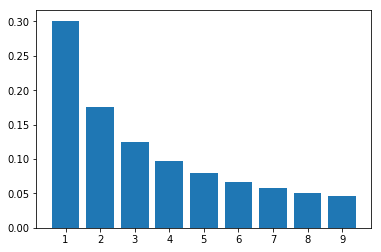

In [2]:
digits = list(range(1,10))
benford = [np.log10(1 + 1/d) for d in digits]
plt.bar(digits, benford)
plt.xticks(digits);

## Load the dataset
---

We've already downloaded a csv from the City of Austin's website (`datasets/Austin_Finance_Online_eCheckbook.csv`). Load that into a `pandas` DataFrame.

In [3]:
df = pd.read_csv('../datasets/Austin_Finance_Online_eCheckbook.csv')
df.head()

/Users/rileydallas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,12,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH
0,2017,3,62,Public Works - Transportation,5120,Transportation Fund,2SPM,Street Preventive Maintenance,2ASP,Asphalt Overlay,154,Commodities,7600,Small tools/minor equipment,D & A WIRE ROPE INC,DAW7009930,V,PRM,6200,16121206643,07587,Tow Bars and Chains,12/15/0016,Paid,1,1,1,PO,6200.0,16112900695,Tow Bars and Chains,1301.35,2016,12
1,2017,10,81,Aviation,5070,Airport Operating Fund,4FOP,"Facilities Management, Operations and Airport ...",4MAX,MaxAdmin,154,Commodities,7730,Inventory purchases,PATHMARK TRAFFIC PRODUCTS,PAT7004575,V,PRM,8100,17070526835,8013059,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",07/08/0017,Paid,1,1,1,PO,8100.0,17061302669,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",466.25,2017,7
2,2017,12,11,Austin Energy,3230,E-Transmission Capital,2900,Fy2001 Transmission Parent,TRAN,Transmission,154,Commodities,7117,Cement/concrete,LAUREN CONCRETE LP,LAU2825500,V,PRC,1100,MAX53835,7507002,"CONCRETE, READY-MIX",09/22/0017,Paid,1,1,1,DOM,1100.0,MAX66734,"CONCRETE, READY-MIX",816.00,2017,9
3,2017,12,72,Neighborhood Housing & Community Development,6141,US Housing/Urban Development-Lead,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractuals,5560,Services-construction contr,VALDEZ REMODELING & WEATHERIZATION INC,VAL7050710,V,PRM,7200,17090532599,92658,Lead and Asbestos Inspection Services,09/08/0017,Paid,1,1,1,DO,7200.0,17073114210,Lead and Asbestos Inspection Services,14793.71,2017,9
4,2017,2,22,Austin Water,5020,Water Utility Operating Fund,TRMT,Treatment,TWTR,Water Operations,154,Commodities,7601,Safety equipment,ALLAN BAKER INC,ALL8305442,V,PRM,2200,16112805225,34564,"Head, Ear, Eye and Face Protection",12/01/0016,Paid,1,1,1,DO,2200.0,16072616990,"Head, Ear, Eye and Face Protection",100.00,2016,11


## Data cleaning
---

Remove all rows where the `AMOUNT` is less than 10 dollars. This will clean up the data by removing small amounts (including refunds), without sacrificing a lot of data.

In [4]:
df.shape

(118543, 34)

In [5]:
df = df[df['AMOUNT'] >=10]
df.shape

(114217, 34)

## Feature Engineering: Add a `FIRST_DIGIT` category
---

Create a column called `FIRST_DIGIT` corresponding to the first digit from the `AMOUNT` column.

In [6]:
df['FIRST_DIGIT'] = df.AMOUNT.map(lambda a: str(a)[0]).astype(int)
df.head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH,FIRST_DIGIT
0,2017,3,62,Public Works - Transportation,5120,Transportation Fund,2SPM,Street Preventive Maintenance,2ASP,Asphalt Overlay,154,Commodities,7600,Small tools/minor equipment,D & A WIRE ROPE INC,DAW7009930,V,PRM,6200,16121206643,07587,Tow Bars and Chains,12/15/0016,Paid,1,1,1,PO,6200.0,16112900695,Tow Bars and Chains,1301.35,2016,12,1
1,2017,10,81,Aviation,5070,Airport Operating Fund,4FOP,"Facilities Management, Operations and Airport ...",4MAX,MaxAdmin,154,Commodities,7730,Inventory purchases,PATHMARK TRAFFIC PRODUCTS,PAT7004575,V,PRM,8100,17070526835,8013059,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",07/08/0017,Paid,1,1,1,PO,8100.0,17061302669,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",466.25,2017,7,4
2,2017,12,11,Austin Energy,3230,E-Transmission Capital,2900,Fy2001 Transmission Parent,TRAN,Transmission,154,Commodities,7117,Cement/concrete,LAUREN CONCRETE LP,LAU2825500,V,PRC,1100,MAX53835,7507002,"CONCRETE, READY-MIX",09/22/0017,Paid,1,1,1,DOM,1100.0,MAX66734,"CONCRETE, READY-MIX",816.00,2017,9,8
3,2017,12,72,Neighborhood Housing & Community Development,6141,US Housing/Urban Development-Lead,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractuals,5560,Services-construction contr,VALDEZ REMODELING & WEATHERIZATION INC,VAL7050710,V,PRM,7200,17090532599,92658,Lead and Asbestos Inspection Services,09/08/0017,Paid,1,1,1,DO,7200.0,17073114210,Lead and Asbestos Inspection Services,14793.71,2017,9,1
4,2017,2,22,Austin Water,5020,Water Utility Operating Fund,TRMT,Treatment,TWTR,Water Operations,154,Commodities,7601,Safety equipment,ALLAN BAKER INC,ALL8305442,V,PRM,2200,16112805225,34564,"Head, Ear, Eye and Face Protection",12/01/0016,Paid,1,1,1,DO,2200.0,16072616990,"Head, Ear, Eye and Face Protection",100.00,2016,11,1


## Plot Actual Percentages vs Expected (Benford) Percentanges
---

Next we'll plot a line chart of actual percentages against the expected Benford percentages as a bar chart.

In [7]:
actuals = df.FIRST_DIGIT.value_counts(normalize=True).sort_index()
actuals

1    0.304797
2    0.173127
3    0.129438
4    0.095634
5    0.083902
6    0.061331
7    0.063957
8    0.046245
9    0.041570
Name: FIRST_DIGIT, dtype: float64

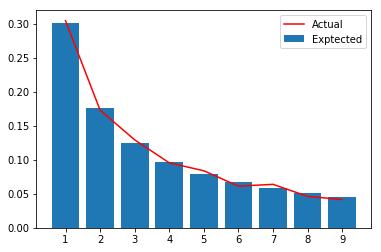

In [8]:
plt.bar(digits, benford, label='Exptected')
plt.plot(actuals, color='r', label='Actual')
plt.xticks(digits)
plt.legend();

## Evaluating Benford's Law by Department
---

Let's repeat the chart above, only this time we'll create a line/bar chart for each department.

To get started, create a list of deparment names that have written at least 1,000 checks.

In [9]:
checks_by_dept = df['DEPT_NM'].value_counts()
large_depts = checks_by_dept[checks_by_dept >= 1000].index
large_depts

Index(['Austin Energy', 'Austin Water', 'Parks & Recreation',
       'Public Works - Transportation', 'Fleet Services', 'Police',
       'Austin Public Health', 'Watershed Protection',
       'Austin Resource Recovery', 'Aviation', 'Building Services',
       'Communications & Technology Management', 'Austin Public Library',
       'Economic Development', 'Emergency Medical Services',
       'Austin Transportation', 'Austin Convention Center',
       'Financial Services', 'Fire', 'Human Resources', 'Wireless',
       'Austin Code', 'Neighborhood Housing & Community Development',
       'Development Services', 'Law'],
      dtype='object')

Now we'll plot actuals vs expected for each of those departments

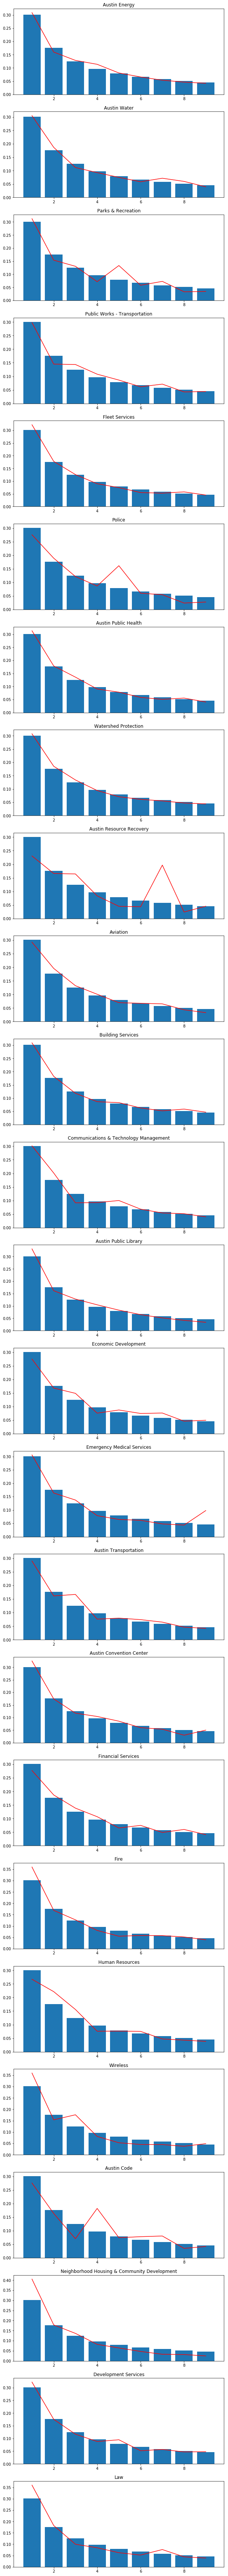

In [10]:
fig, axes = plt.subplots(nrows=len(large_depts), figsize=(10, 5 * len(large_depts)))
for i, dept in enumerate(large_depts):
    dept_checks = df.loc[df['DEPT_NM'] == dept, 'FIRST_DIGIT'].value_counts(normalize=True).sort_index()
    axes[i].bar(digits, benford)
    axes[i].plot(dept_checks, color='r')
    axes[i].set_title(dept)
    

## Deep dive
---

We can see a few anomalies with Police, EMS, Austin Resource Recovery and Parks & Rec. Let's dig deeper and investigate the root causes. For this exercise, pick a department that is deviating from Benford's law and find out why.

In [11]:
arr = df[(df['DEPT_NM'] == 'Austin Resource Recovery') & (df['FIRST_DIGIT'] == 7)]
# ARR has a compost/chicken coop rebate up to $75, which is why there's a spike in the 7's
arr.AMOUNT.value_counts()

75.00       473
75.98        48
70.00        19
750.00       17
73.00         3
72.75         3
74.00         2
74.99         2
74.19         2
795.00        2
70.50         2
70.20         2
71.05         2
759.21        2
7700.00       2
715.00        1
76.14         1
79.60         1
7872.64       1
738.36        1
74.33         1
770.00        1
7530.00       1
74.49         1
77.95         1
72.53         1
7059.56       1
73.47         1
7556.98       1
7062.45       1
           ... 
7057.07       1
76121.61      1
7773.75       1
7548.26       1
7452.51       1
7448.66       1
748.86        1
78.30         1
767.26        1
7151.47       1
75.33         1
792.03        1
78.02         1
760.50        1
71.16         1
777.80        1
7824.23       1
700.00        1
706.58        1
7500.00       1
78.11         1
71.28         1
77648.95      1
77.22         1
771.93        1
795.98        1
70.08         1
7298.75       1
71.40         1
719.12        1
Name: AMOUNT, Length: 79